In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from gdp_data_preparation import prepare_gdp_data

In [2]:
df_gdp = pd.read_csv('total_gdp_ppp_inflation_adjusted.csv', index_col='country')

In [3]:
gdp_country = prepare_gdp_data(df_gdp,'Spain')

c:\Users\mrosk\OneDrive\Desktop\Time Series Analysis\Time-Series-Analysis\Unit_4_ARMA_Models\gdp_data_preparation.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_digit = gdp_country[i][-1:]
c:\Users\mrosk\OneDrive\Desktop\Time Series Analysis\Time-Series-Analysis\Unit_4_ARMA_Models\gdp_data_preparation.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_two_digit = gdp_country[i][-2:]
c:\Users\mrosk\OneDrive\Desktop\Time Series Analysis\Time-Series-Analysis\Unit_4_ARMA_Models\gdp_data_preparation.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, in

In [4]:
gdp_country

1950    18.506858
1951    18.594634
1952    18.675323
1953    18.667541
1954    18.742764
          ...    
2009    21.094829
2010    21.101702
2011    21.108528
2012    21.101702
2013    21.094829
Name: Spain, Length: 64, dtype: object

In [6]:
df_gdp_raw = pd.to_numeric(gdp_country).apply(np.exp)

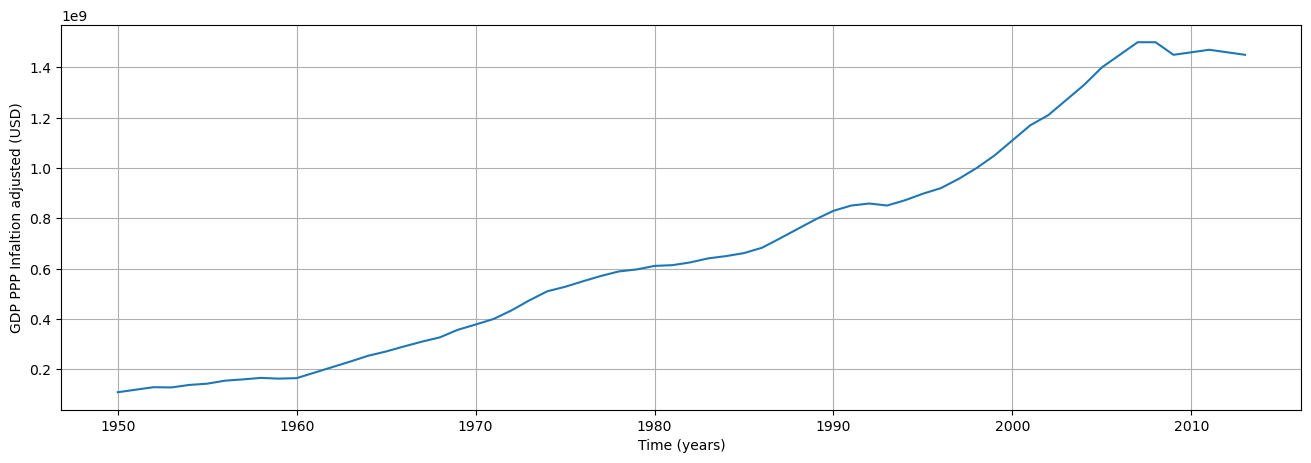

In [12]:
plt.figure(figsize=(16,5), dpi=100)

plt.plot(df_gdp_raw)
plt.gca().set(xlabel='Time (years)', ylabel = 'GDP PPP Infaltion adjusted (USD)')
plt.xticks(np.arange(min(gdp_country.index), max(gdp_country.index)+1,10.0))
plt.grid()
plt.show()


In [18]:
resultADF = adfuller(gdp_country, regression='n', regresults=True)
print('ADF Statistic %f' % resultADF[0])
print('p-value: %f' % resultADF[1])

ADF Statistic 2.715548
p-value: 0.999228


In [19]:
gdp_country_diff = gdp_country.diff().dropna()

In [20]:
gdp_country_diff

1951    0.087776
1952    0.080689
1953   -0.007782
1954    0.075223
1955    0.035591
          ...   
2009   -0.033902
2010    0.006873
2011    0.006826
2012   -0.006826
2013   -0.006873
Name: Spain, Length: 63, dtype: object

In [29]:
resultADF = adfuller(gdp_country_diff, regression='n',regresults=True)
print('ADF Statistic %f' % resultADF[0])
print('p-value: %f' % resultADF[1])

ADF Statistic -2.609921
p-value: 0.008779


In [30]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

Text(0, 0.5, 'Correlation')

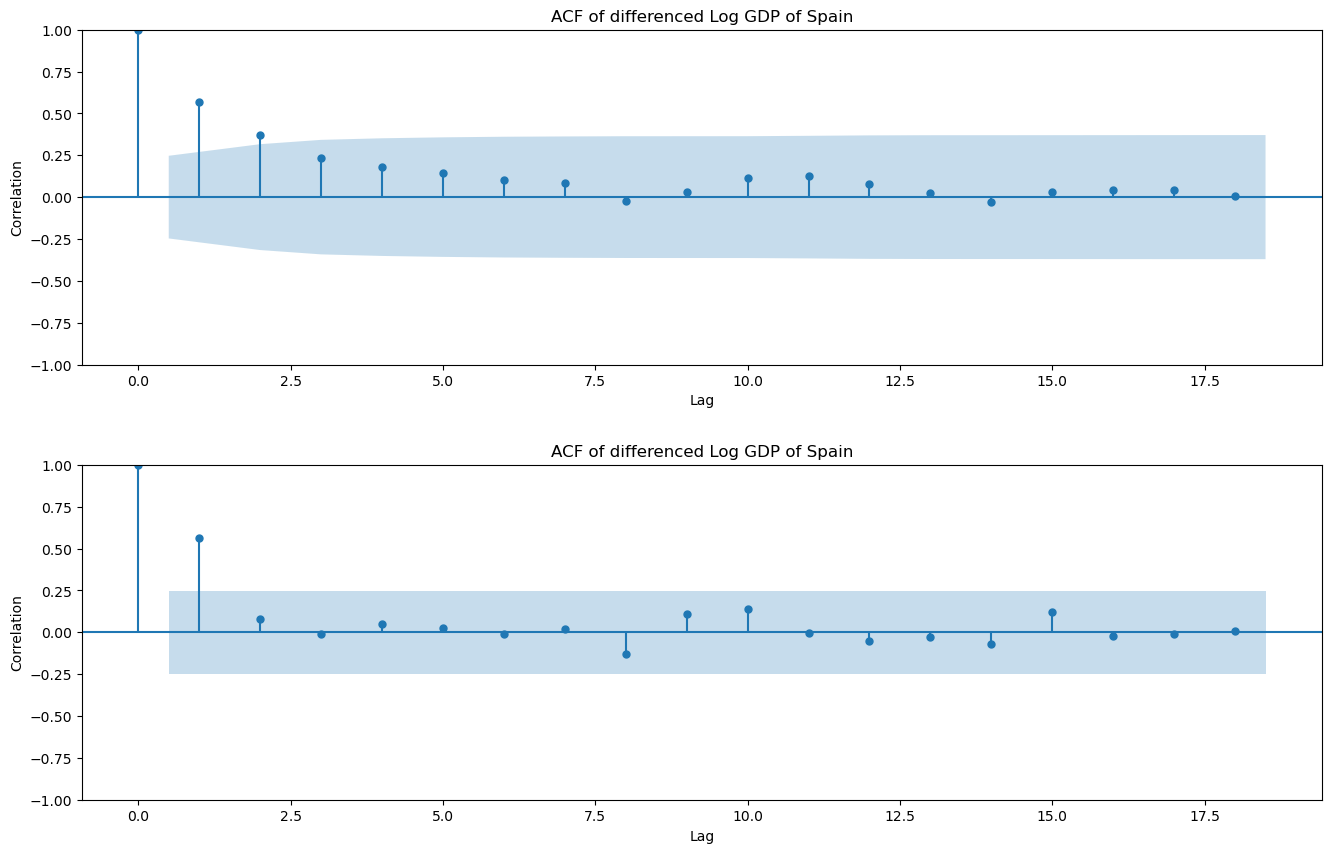

In [31]:
fig, axes = plt.subplots(2,1,figsize = (16,10), dpi = 100)
plt.subplots_adjust(hspace = 0.3)

plot_acf(gdp_country_diff, alpha = 0.05, ax=axes[0], title='ACF of differenced Log GDP of Spain')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Correlation')

plot_pacf(gdp_country_diff, alpha = 0.05, ax=axes[1], title='ACF of differenced Log GDP of Spain')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Correlation')

In [33]:
from statsmodels.tsa.arima.model import ARIMA

gdp_country_np = pd.to_numeric(gdp_country).values

In [36]:
order = (1,1,0)
model = ARIMA(endog=gdp_country_np, exog=None, trend='t',order=order)
m_ar1 = model.fit()

print(m_ar1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   64
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 139.814
Date:                Wed, 16 Oct 2024   AIC                           -273.628
Time:                        12:22:23   BIC                           -267.199
Sample:                             0   HQIC                          -271.099
                                 - 64                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0410      0.008      5.070      0.000       0.025       0.057
ar.L1          0.5968      0.121      4.937      0.000       0.360       0.834
sigma2         0.0007   9.39e-05      7.312      0.0